In [217]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score

from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("mnist")
train_data = dataset["train"]
test_data = dataset["test"]


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
num_samples = 5         # shows a sample number 
for i in range(num_samples):
    image = train_data[i]["image"]
    label = train_data[i]["label"]
    
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.show()

In [320]:
# only processing traing data need to do to rest when testing
input_data = np.zeros((len(train_data), 28, 28, 1)) # creates empty array to soon store the normaizled data
what_num = np.array([-1]*len(train_data))

for i in range(len(train_data)):
    image = train_data[i]["image"]
    what_num[i] = train_data[i]["label"]
    input_data[i] = np.expand_dims(image, axis=-1) / 255.0  # so between 0-1


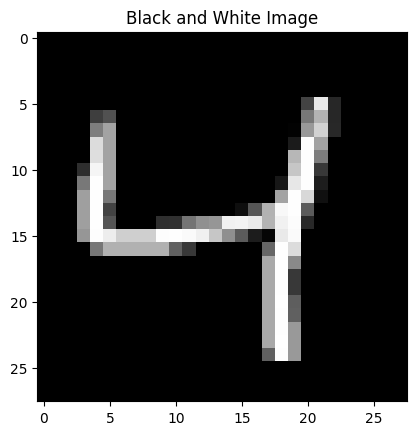

In [290]:
input_data = input_data.reshape(-1, 28, 28, 1)
print("Input data shape:", input_data.shape)

Input data shape: (60000, 28, 28, 1)


In [221]:
model = tf.keras.models.Sequential()
#from tf.keras.layers import Dense


model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))   # what about the -1 in the beginin?
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))



In [222]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [292]:
invalid_labels = np.logical_or(what_num < 0, what_num >= 10)
# Remove invalid label values
input_data = input_data[~invalid_labels]
what_num = what_num[~invalid_labels]

# Verify the updated shapes
print("Updated input data shape:", input_data.shape)
print("Updated target labels shape:", what_num.shape)

Updated input data shape: (60000, 28, 28, 1)
Updated target labels shape: (60000,)


In [224]:
model.fit(input_data, what_num, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6370 - accuracy: 0.8368
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3398 - accuracy: 0.9060
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.9179
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2637 - accuracy: 0.9267
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2402 - accuracy: 0.9331
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2209 - accuracy: 0.9384
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2044 - accuracy: 0.9431
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1906 - accuracy: 0.9473
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1782 - accuracy: 0.9510
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.167

In [319]:
# len(test_data) # says 1000
# len(dataset) # says 2?

In [225]:
#formating the test data
input_data_test = np.zeros((len(test_data), 28, 28, 1))
what_num_test = np.array([-1] * len(test_data))

for i in range(len(test_data)):
    image = test_data[i]["image"]
    what_num_test[i] = test_data[i]["label"]
    input_data_test[i] = np.expand_dims(image, axis=-1) / 255.0

input_data_test = input_data_test.reshape(-1, 28, 28, 1)
print("Testing data shape:", input_data_test.shape)


Testing data shape: (10000, 28, 28, 1)


In [226]:

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(input_data_test, what_num_test)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1110 - accuracy: 0.9675
Testing Loss: 0.11099907010793686
Testing Accuracy: 0.9674999713897705


In [375]:
from PIL import Image

def display_image(array):
    # Display the black and white image
    plt.imshow(array*255, cmap="gray")
    plt.title("Black and White Image")
    plt.show()
    

image = Image.open('test_image.png')
img_array = np.array(image)  # Convert the image to a NumPy array
personal_img = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image and add batch dimension

# Perform the prediction
prediction = model.predict(personal_img)

# Get the predicted label
predicted_label = np.argmax(prediction)

# Print the predicted label
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 38ms/step
Predicted Label: 3


In [228]:
tf.saved_model.save(model, "nn_number_model")

INFO:tensorflow:Assets written to: nn_number_model\assets


INFO:tensorflow:Assets written to: nn_number_model\assets


In [229]:
#print(input_data[0])
from scipy.ndimage import rotate

def rotate_array(input_array, angle):
    # Perform the rotation using scipy.ndimage.rotate
    rotated_array = rotate(input_array, angle, reshape=False, mode='constant', cval=0.0, order=1)

    return rotated_array


In [447]:
from scipy.ndimage import zoom

def modify_border(array, num_pixels):
    # Convert the input array to a NumPy array
    array = np.array(array)
    if num_pixels ==0:
        return array
    
    if array.ndim == 2:
        # For 2-dimensional arrays (single channel), add a new axis to maintain shape consistency
        array = np.expand_dims(array, axis=-1)

    # Get the current dimensions of the array
    height, width, channels = array.shape

    # Calculate the new dimensions after modifying the border
    new_height = height + 2 * abs(num_pixels)
    new_width = width + 2 * abs(num_pixels)

    # Create a new array with the new dimensions
    new_array = np.zeros((new_height, new_width, channels), dtype=array.dtype)

    if num_pixels > 0:
        # Add num_pixels border of zeros (all black)
        new_array[num_pixels:num_pixels + height, num_pixels:num_pixels + width, :] = array
    elif num_pixels < 0:
        # Remove abs(num_pixels) pixels from the outermost border (all zeros)
        new_array = array[abs(num_pixels):-abs(num_pixels), abs(num_pixels):-abs(num_pixels), :]

    return resize_image(new_array)



from skimage.transform import resize

def resize_image(image):
    # Convert the image to a NumPy array
    image_array = np.array(image)
    scale_factor = 28 / image.shape[0]
    # Compute the new dimensions after resizing
    new_height = int(image_array.shape[0] * scale_factor)
    new_width = int(image_array.shape[1] * scale_factor)

    # Resize the image using skimage.transform.resize
    resized_image = resize(image_array, (new_height, new_width), anti_aliasing=True)

    return resized_image

# Example usage:


#                                          i like -2 (make bigger) to 12 for really small
# # Add outer border (all zeros)
# result_image_add = add_or_remove_outer_border(input_image, -2)
# print("Image with added outer border:")
# print(display_image(result_image_add))

# # Remove outer border (all zeros)
# result_image_remove =  add_or_remove_outer_border(input_image, 12)
# print("Image with removed outer border:")
# print(display_image(result_image_remove))


In [231]:
import numpy as np


def shift_image(image, x_offset, y_offset):
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Get the dimensions of the original image
    height, width = image_array.shape

    # Create an empty array to hold the shifted image
    shifted_image = np.zeros((height, width), dtype=image_array.dtype)

    # Calculate the ranges for x and y directions
    x_start = max(0, x_offset)
    x_end = min(width, width + x_offset)
    y_start = max(0, y_offset)
    y_end = min(height, height + y_offset)

    # Copy the non-zero elements from the original image to the shifted image
    shifted_image[y_start:y_end, x_start:x_end] = image_array[y_start - y_offset:y_end - y_offset, x_start - x_offset:x_end - x_offset]

    return shifted_image

# Example usage:


# will try to do 4 in each direction

# resized_image = shift_image(input_image, x_offset, y_offset)
# print("Resized Image:")
# print(display_image(resized_image))


In [232]:
import numpy as np

def add_random_pixel_noise(image, num_pixels, new_value):
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Get the shape of the image
    height, width = image_array.shape

    # Flatten the image array to make it easier to randomly select pixels
    flattened_image = image_array.flatten()

    # Generate random indices to select the pixels
    selected_indices = np.random.choice(len(flattened_image), size=num_pixels, replace=False)

    # Set the values of the selected pixels to the new value
    flattened_image[selected_indices] = new_value

    # Reshape the flattened image back to the original shape
    noisy_image = flattened_image.reshape(height, width)

    return noisy_image
# Example usage:

#noisy_image = add_random_pixel_noise(noisy_image, 5, .9)
#print("Noisy Image:")
#print(display_image(noisy_image))


In [337]:
import random as r

def change_image(array):
    angle = r.randint(-12, 12) #12 - -12
    array = rotate_array(array, angle)   
    num_pix = r.randint(-2, 12)
    array = add_or_remove_outer_border(array, num_pix)
    x_offset,  y_offset = r.randint(-4,4), r.randint(-4,4)
    array = shift_image(array, x_offset, y_offset)  # 4- -4 , 4-4 
    num_pixs = r.randint(0, 20)
    array = add_random_pixel_noise(array, num_pixs, .5) #  0-30 .5
    return array



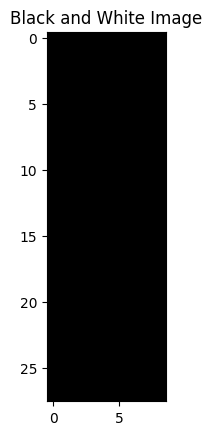

In [344]:

#display_image(input_data_test[3]) 
display_image(change_image(input_data[1][14]))

In [ ]:
display_image(change_image(personal_img[0]))

display_image(change_image(input_data[0]))

In [448]:
display_image(modify_border(input_data[0], 1)) 


TypeError: resize_image() missing 1 required positional argument: 'scale_factor'

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

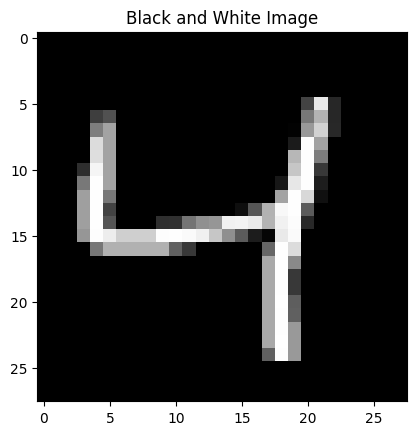

In [417]:
print(input_data[2])
display_image(input_data[2])